In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set()
import pylab

from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox

In [3]:
df = pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [4]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [5]:
df.describe(include="object").T

,count,unique,top,freq
Posted On,4746,81,2022-07-06,311
Floor,4746,480,1 out of 2,379
Area Type,4746,3,Super Area,2446
Area Locality,4746,2235,Bandra West,37
City,4746,6,Mumbai,972
Furnishing Status,4746,3,Semi-Furnished,2251
Tenant Preferred,4746,3,Bachelors/Family,3444
Point of Contact,4746,3,Contact Owner,3216


In [6]:
#lets look at the rent price in lowest,median highest and average.
print(f"Lowest Rent: {df['Rent'].min()}")
print(f"Median Rent: {df['Rent'].median()}")
print(f"Highest Rent: {df['Rent'].max()}")
print(f"Average Rent: {df['Rent'].mean().round()}")

Lowest Rent: 1200
Median Rent: 16000.0
Highest Rent: 3500000
Average Rent: 34993.0


### Checking Distribution in Numerical Variable

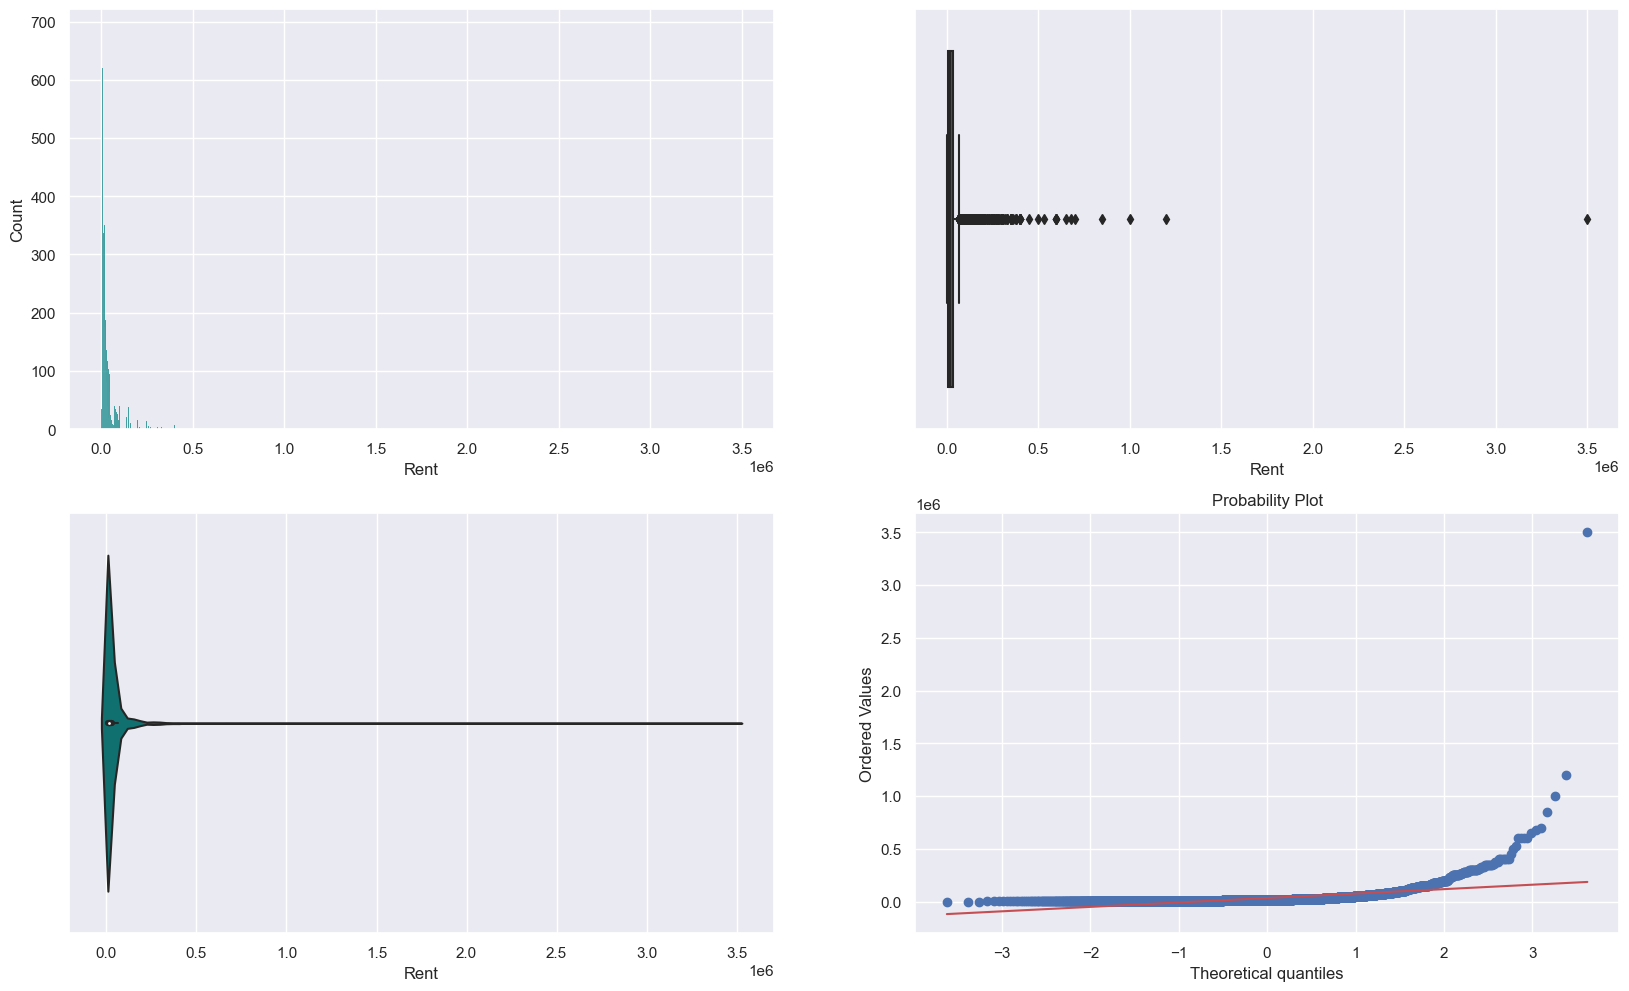

In [7]:
'''Distribution of RENT as Target in this data'''

fig, ax = plt.subplots(2,2, figsize=(20,12))
ax1 = sns.histplot(x= df['Rent'], color='teal', ax=ax[0,0])
ax2 = sns.boxplot(x=df['Rent'], color='teal', ax=ax[0,1])
ax3 = sns.violinplot(x=df['Rent'], color='teal', ax=ax[1,0])
ax4 = probplot(df['Rent'], plot=pylab)
pylab.show()

In [8]:
def remove_outliers_IQR(df, multiplier=1.5):
    """
    Remove outliers based on Interquartile Range (IQR).

    Parameters:
    df (Pandas DataFrame): Input data
    multiplier (float, optional): IQR multiplier (default: 1.5)

    Returns:
    Pandas DataFrame: Cleaned data with outliers removed
    """
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - multiplier * IQR)) | (df > (Q3 + multiplier * IQR))
    return df[~outliers]

In [9]:
df['Rent'] = remove_outliers_IQR(df['Rent'])

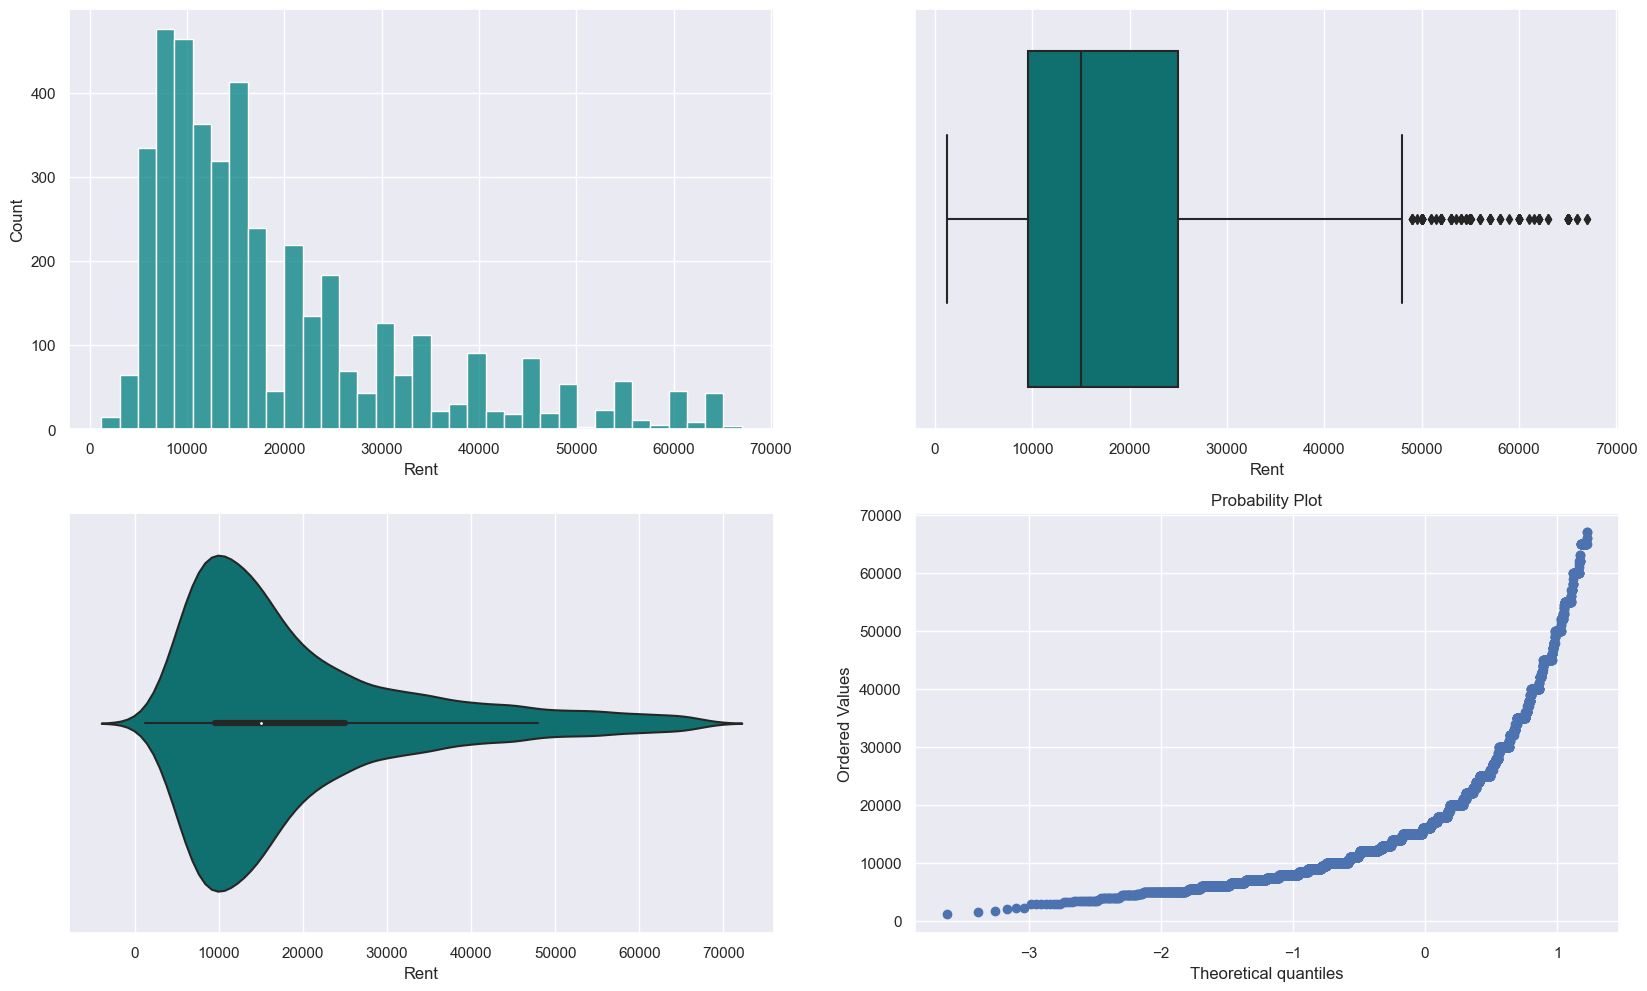

In [10]:
fig, ax = plt.subplots(2,2, figsize=(20,12))
ax1 = sns.histplot(x= df['Rent'], color='teal', ax=ax[0,0])
ax2 = sns.boxplot(x=df['Rent'], color='teal', ax=ax[0,1])
ax3 = sns.violinplot(x=df['Rent'], color='teal', ax=ax[1,0])
ax4 = probplot(df['Rent'], plot=pylab)
pylab.show()

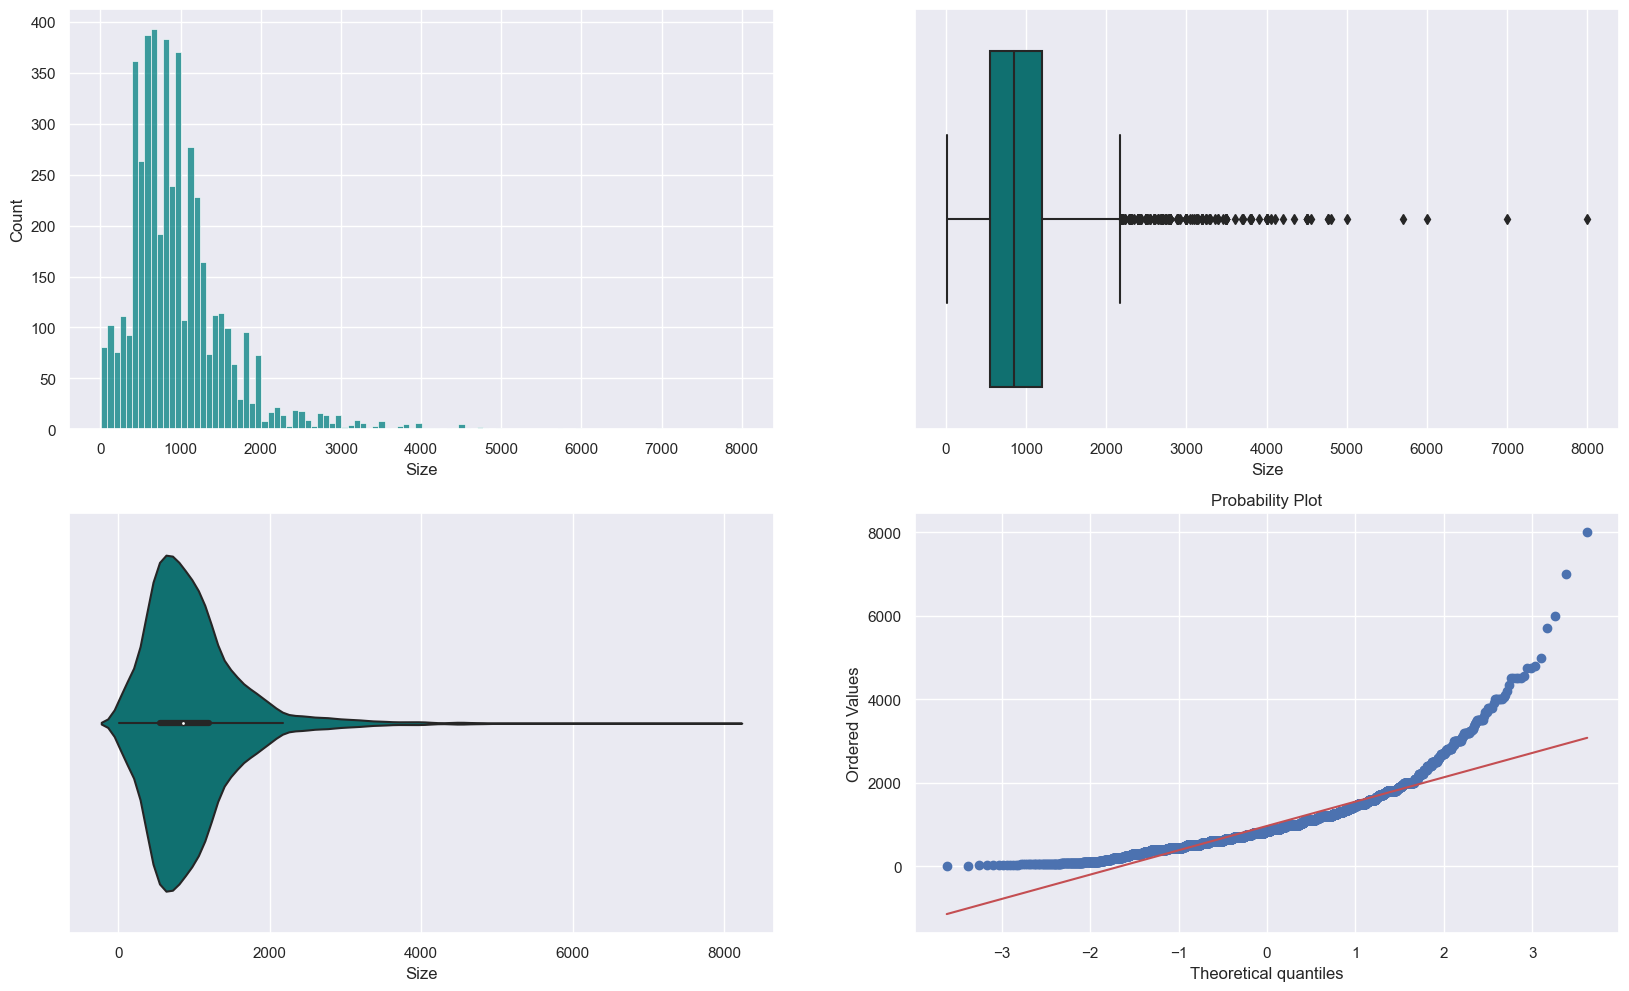

In [11]:
'''Distribution of SIZE'''
fig, ax =  plt.subplots(2,2, figsize=(20,12))
ax1 = sns.histplot(x=df['Size'], ax=ax[0,0], color='teal')
ax2 = sns.boxplot(x=df['Size'], ax=ax[0,1], color='teal')
ax3 = sns.violinplot(x=df['Size'], ax=ax[1,0], color='teal')
ax4 = probplot(df['Size'], plot=pylab)
pylab.show()

In [12]:
df['Size'] = remove_outliers_IQR(df['Size'])

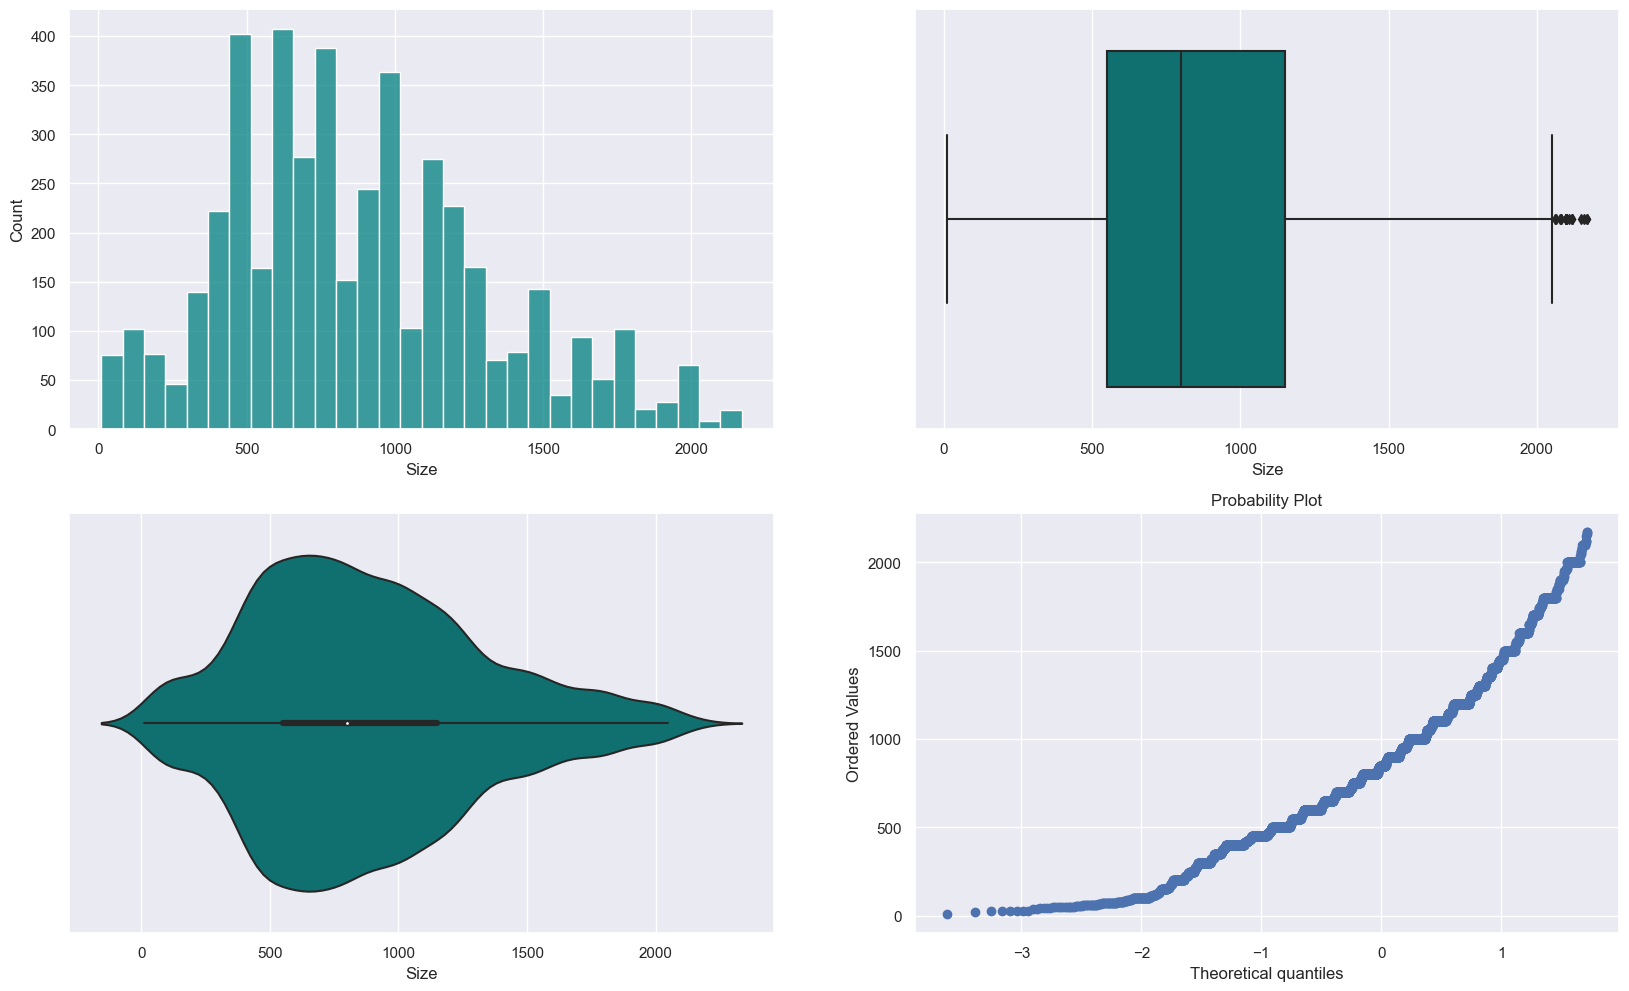

In [13]:
fig, ax =  plt.subplots(2,2, figsize=(20,12))
ax1 = sns.histplot(x=df['Size'], ax=ax[0,0], color='teal')
ax2 = sns.boxplot(x=df['Size'], ax=ax[0,1], color='teal')
ax3 = sns.violinplot(x=df['Size'], ax=ax[1,0], color='teal')
ax4 = probplot(df['Size'], plot=pylab)
pylab.show()

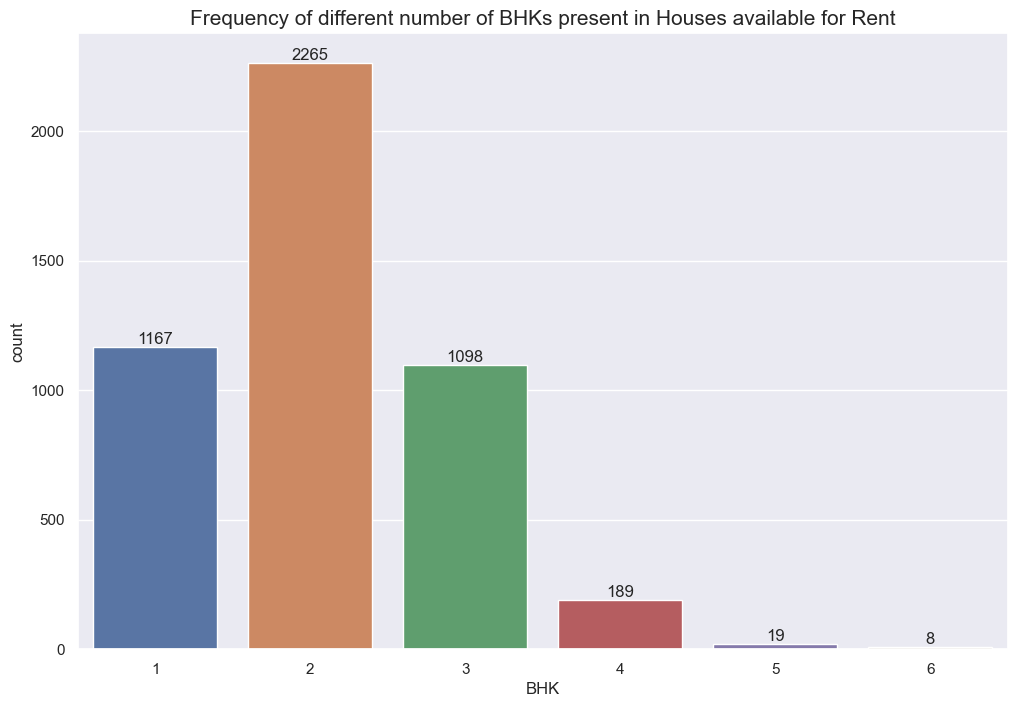

In [14]:
'''Checking BHK'''

fig, ax =  plt.subplots(figsize=(12,8))
ax = sns.countplot(x='BHK', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Frequency of different number of BHKs present in Houses available for Rent", fontsize=15)
plt.show()

fig = px.pie(df, names='BHK', height=700, width=700, color_discrete_sequence=px.colors.sequential.deep,
                title='Pie Chart for different number of BHks present in Houses available for Rent')
#fig.update_traces(textfont_size=15)
fig.show()

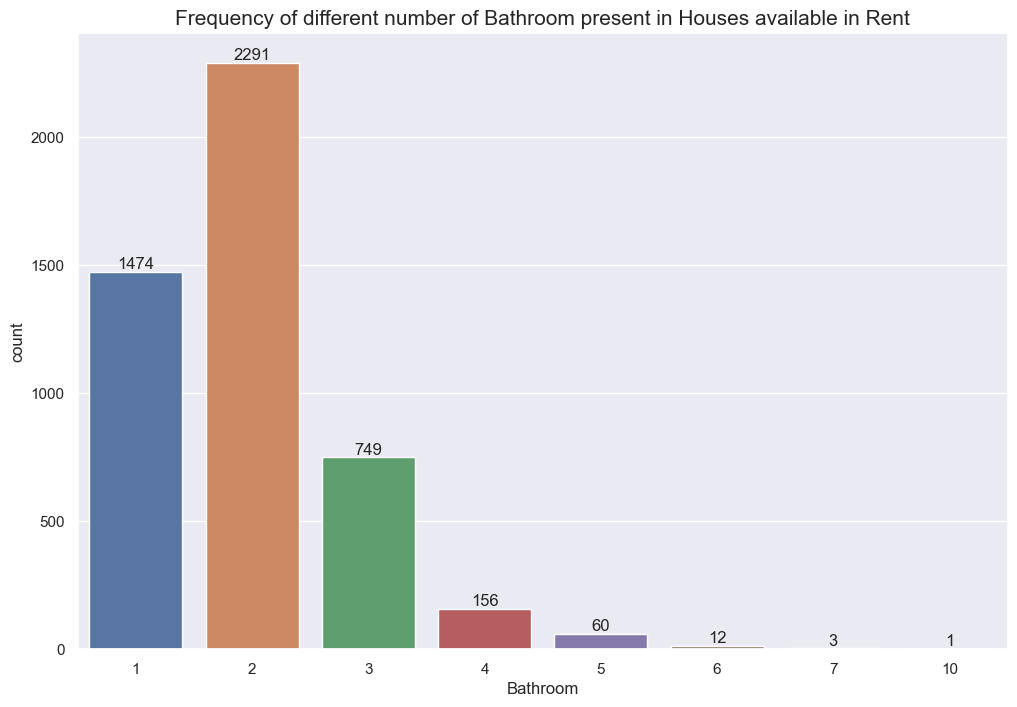

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='Bathroom', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Frequency of different number of Bathroom present in Houses available in Rent", fontsize=15)
plt.show()


fig = px.pie(
    df,
    names='Bathroom',
    height=700,
    width=700,
    color_discrete_sequence=px.colors.sequential.deep,
    title='Pie Chart for different number of Bathrooms present in Houses available for Rent'
)
fig.show()


In [ ]:
# Trend Analysis: Rent Prices Over Time

df['Posted On'] = pd.to_datetime(df['Posted On'])

plt.figure(figsize=(12, 6))
df.set_index('Posted On')['Rent'].resample('M').mean().plot()
plt.title('Average Rent Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rent')
plt.show()

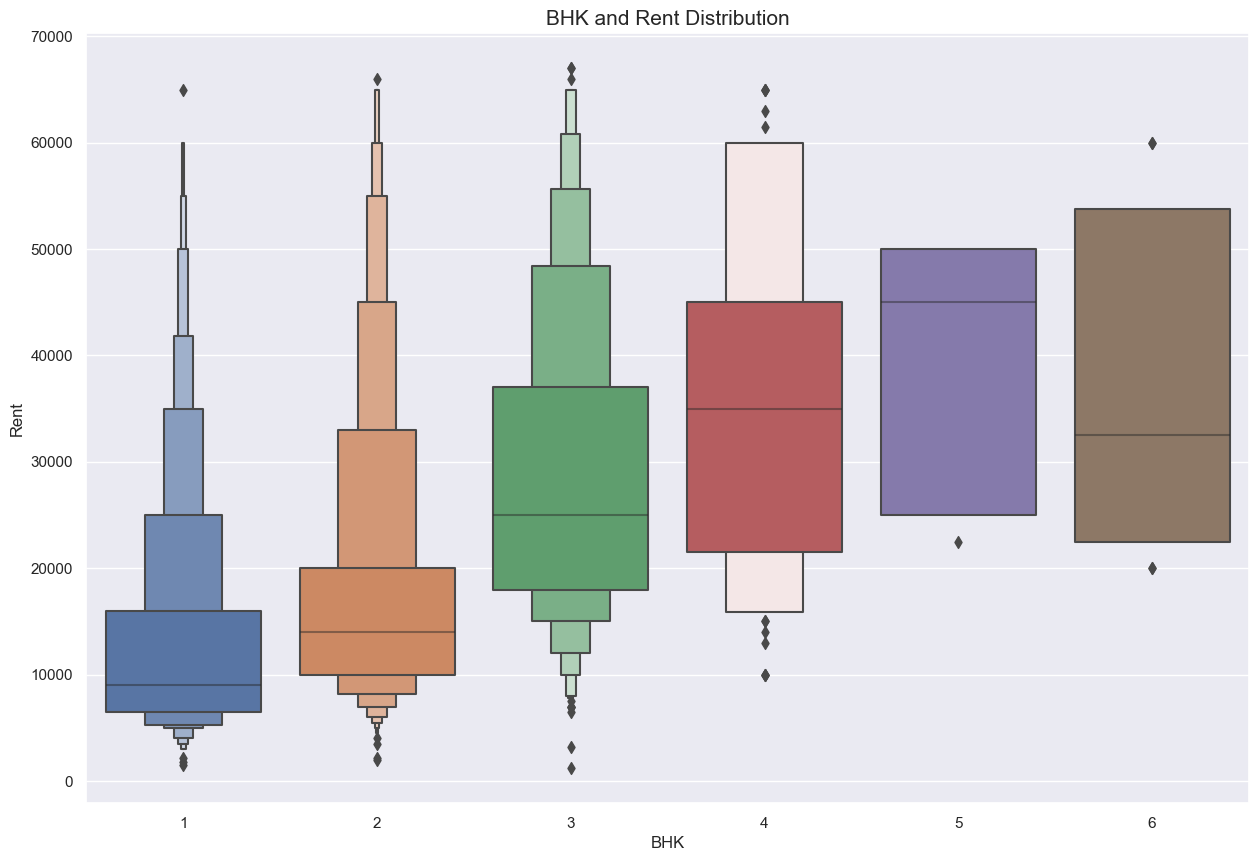

In [16]:
#BHK and Rent

fig, ax = plt.subplots(figsize=(15,10))
sns.boxenplot(x="BHK", y="Rent", data=df)
plt.title("BHK and Rent Distribution", fontsize=15)
plt.show()

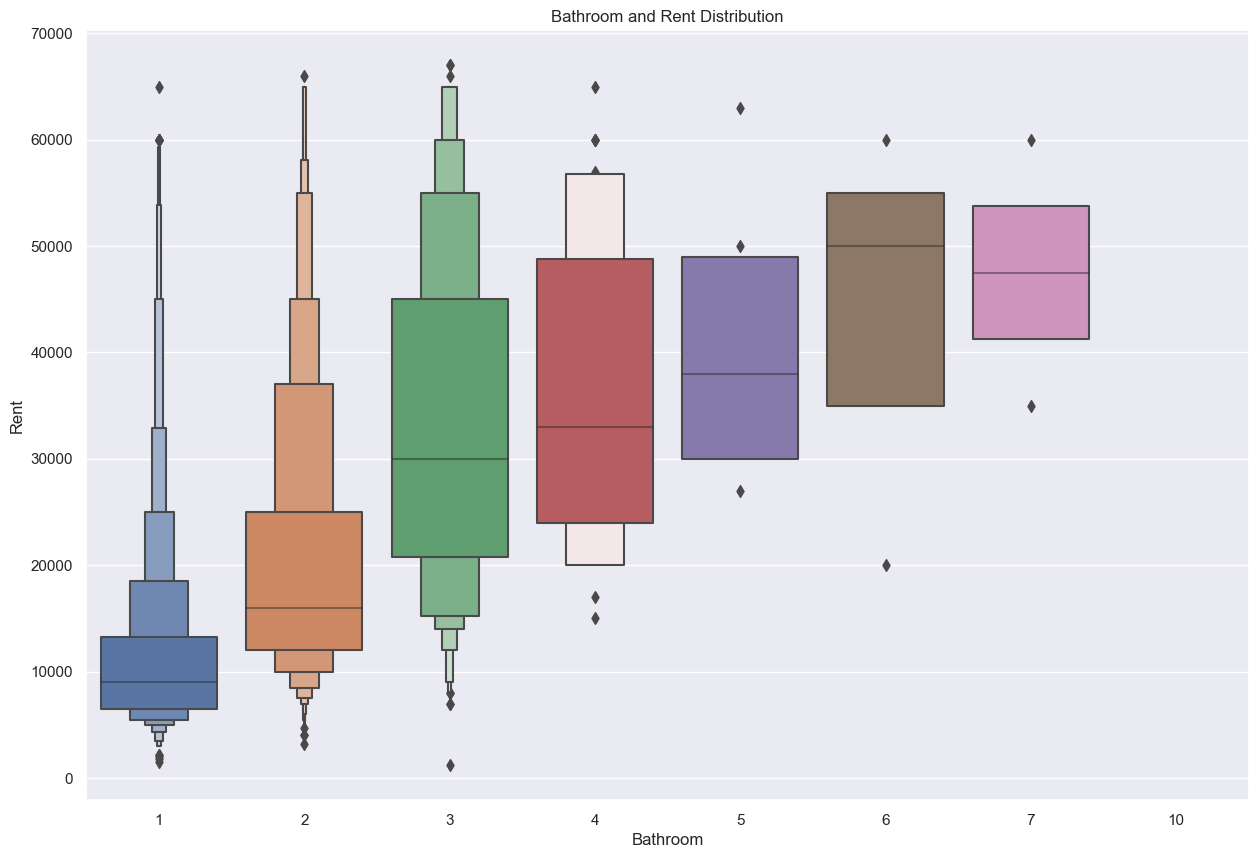

In [18]:
#Bathroom and Rent
fig, ax = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Bathroom", y="Rent", data=df)
plt.title("Bathroom and Rent Distribution")
plt.show()

### Categorical Variable vs Rent

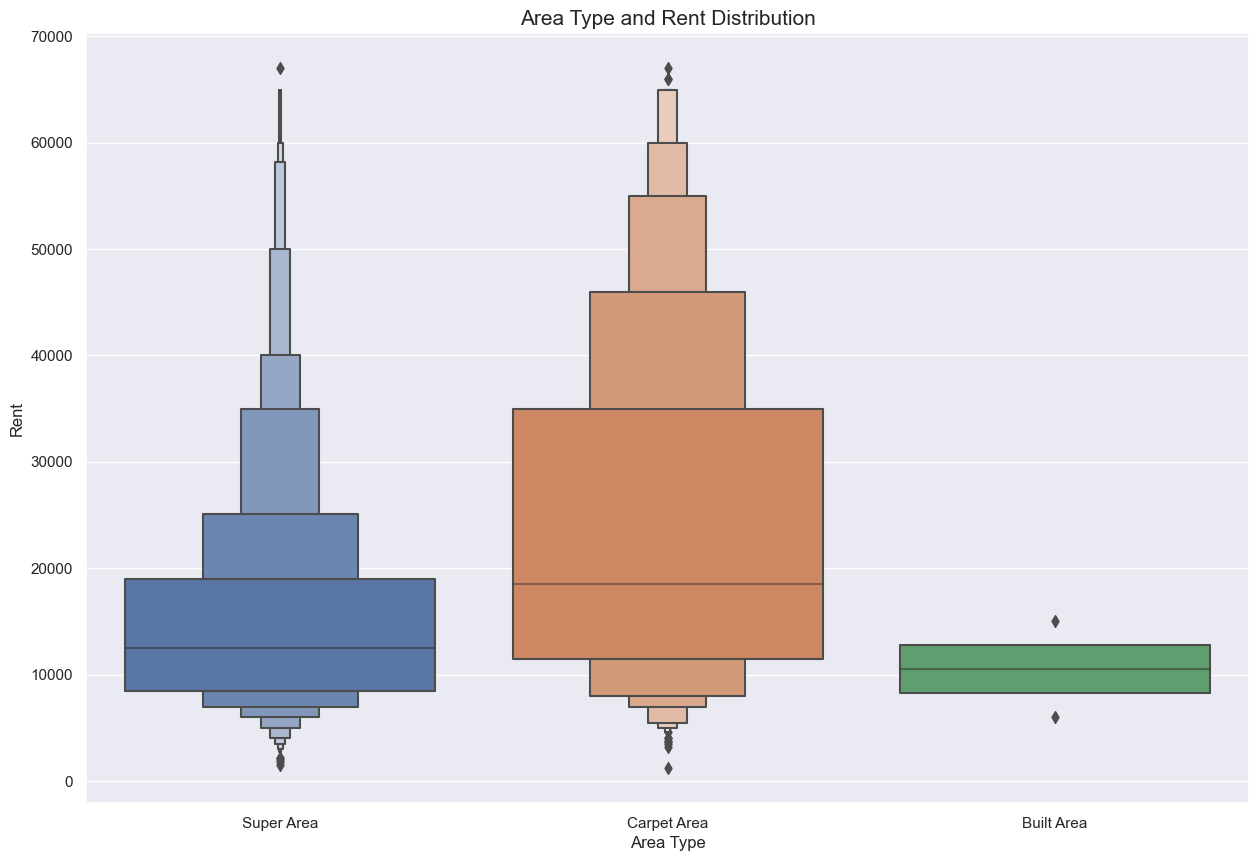

In [20]:
#Area Type and Rent Distribution
fig, ax = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Area Type", y="Rent", data=df)
plt.title("Area Type and Rent Distribution", fontsize=15)
plt.show()

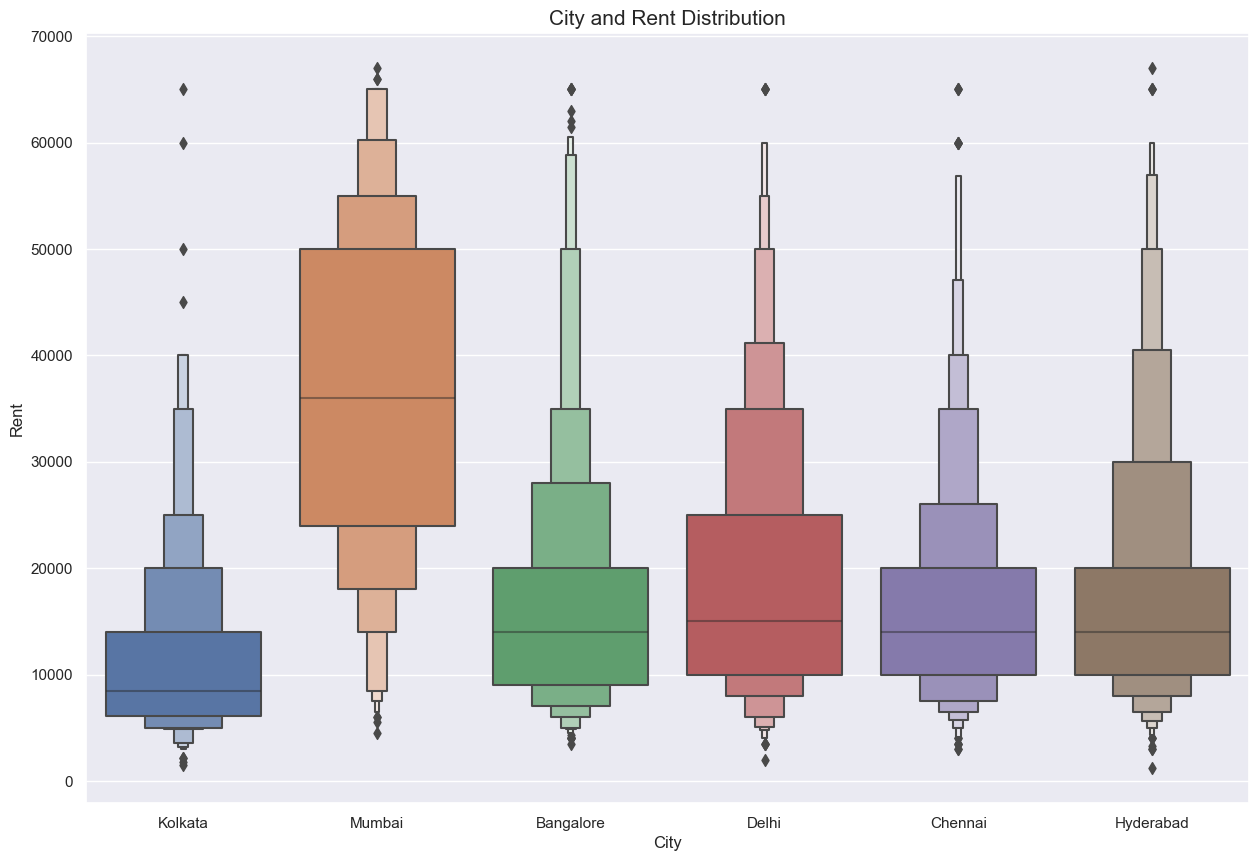

In [21]:
#City and Rent Distribution
fig, ax = plt.subplots(figsize=(15,10))
sns.boxenplot(x="City", y="Rent", data=df)
plt.title("City and Rent Distribution", fontsize=15)
plt.show()

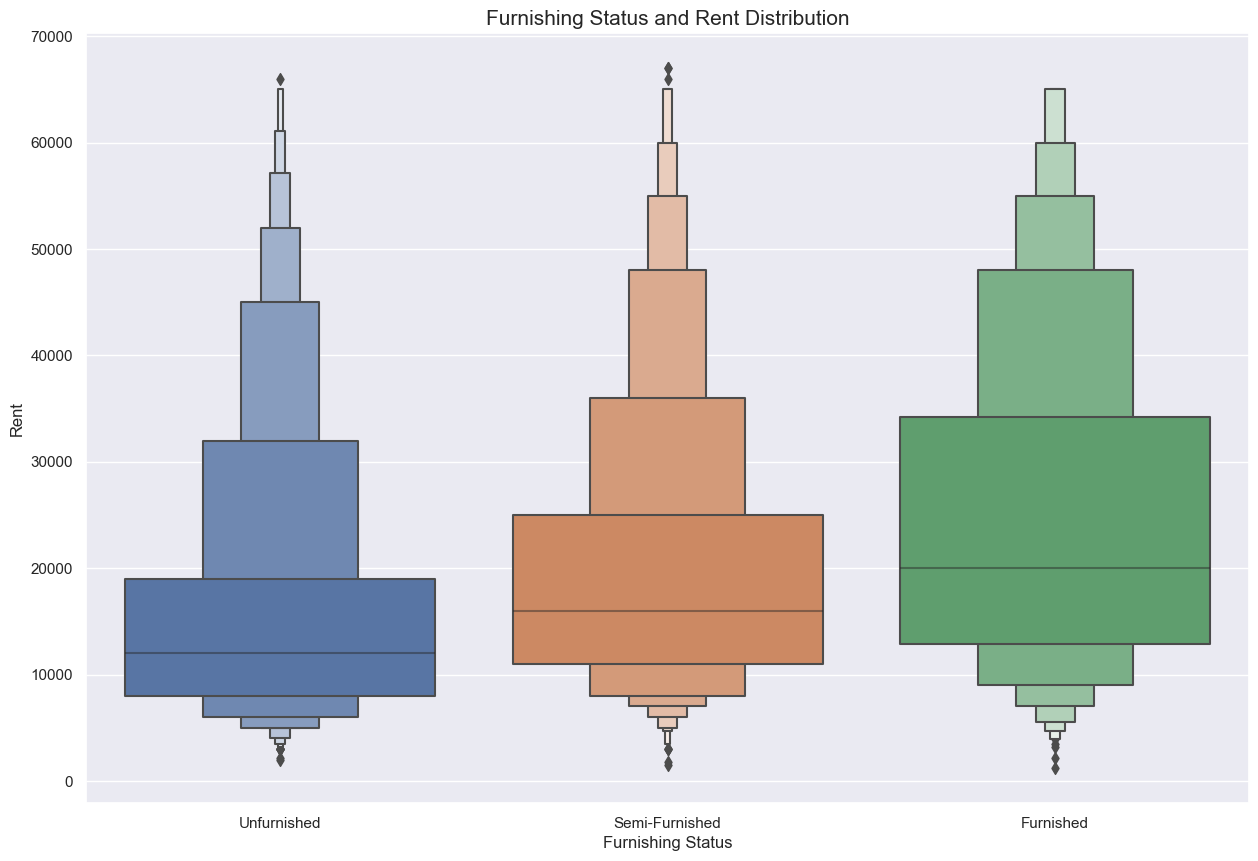

In [23]:
# Furnishing Status and Rent Distribution
fig, ax = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Furnishing Status", y="Rent", data=df)
plt.title("Furnishing Status and Rent Distribution", fontsize=15)
plt.show()

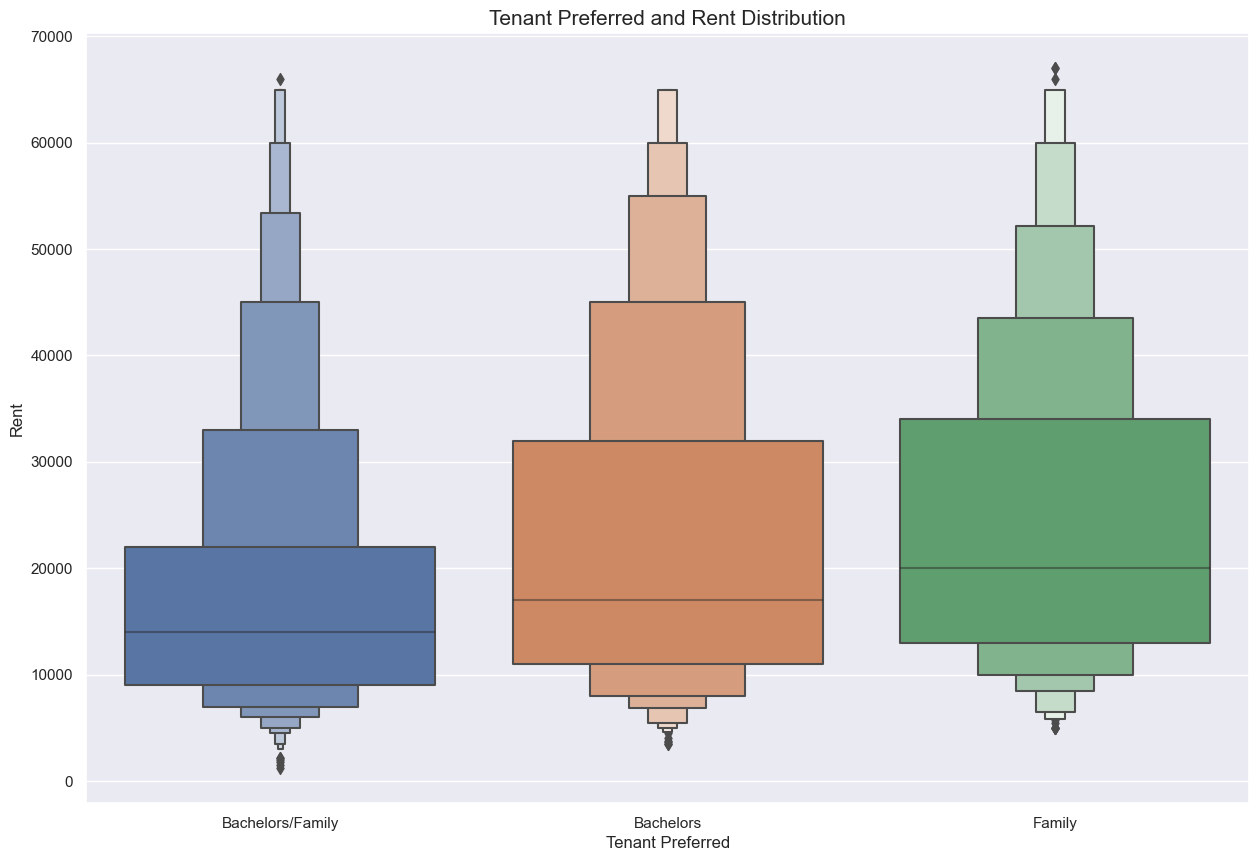

In [24]:
# Tenant Preferred and Rent Distribution
fig, ax = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Tenant Preferred", y="Rent", data=df)
plt.title("Tenant Preferred and Rent Distribution", fontsize=15)
plt.show()

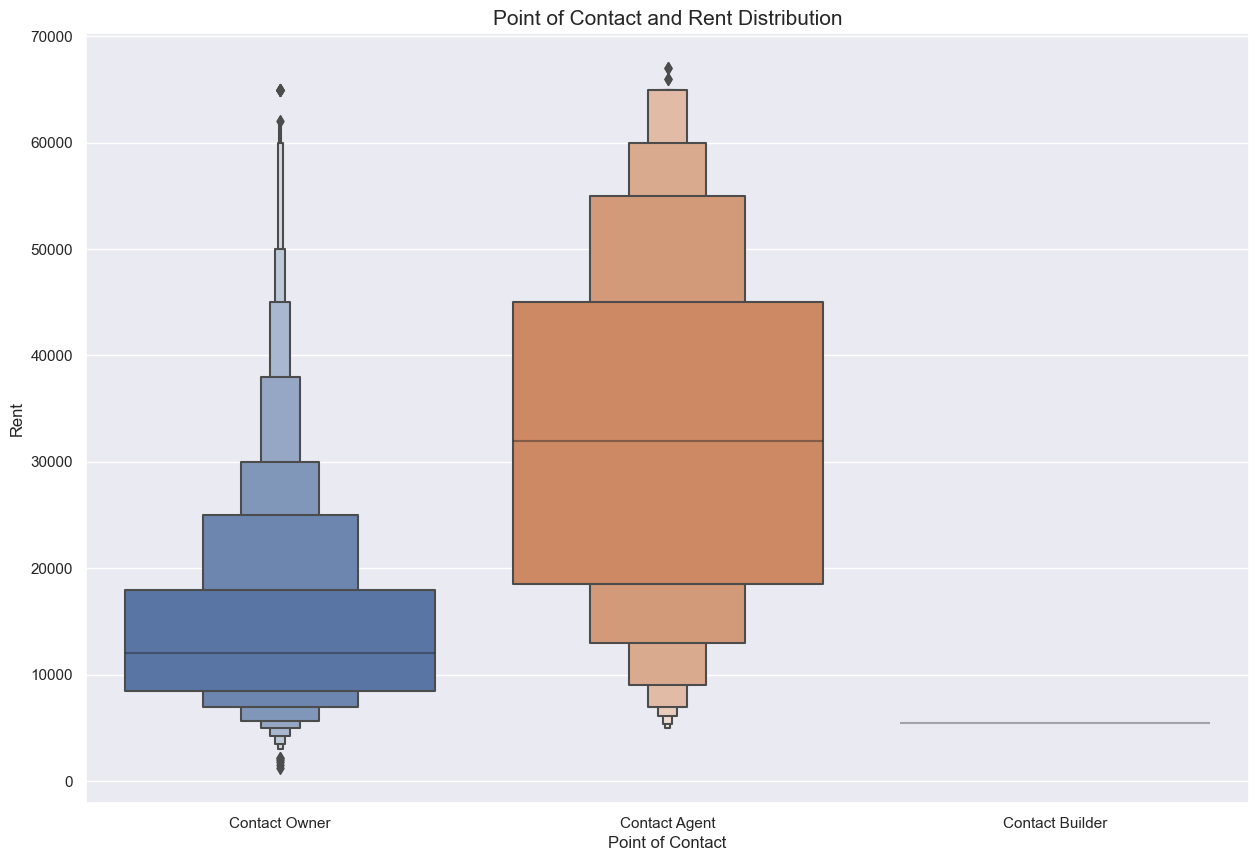

In [25]:
#Point of Contact and Rent Distribution

fig, ax = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Point of Contact", y="Rent", data=df)
plt.title("Point of Contact and Rent Distribution", fontsize=15)
plt.show()

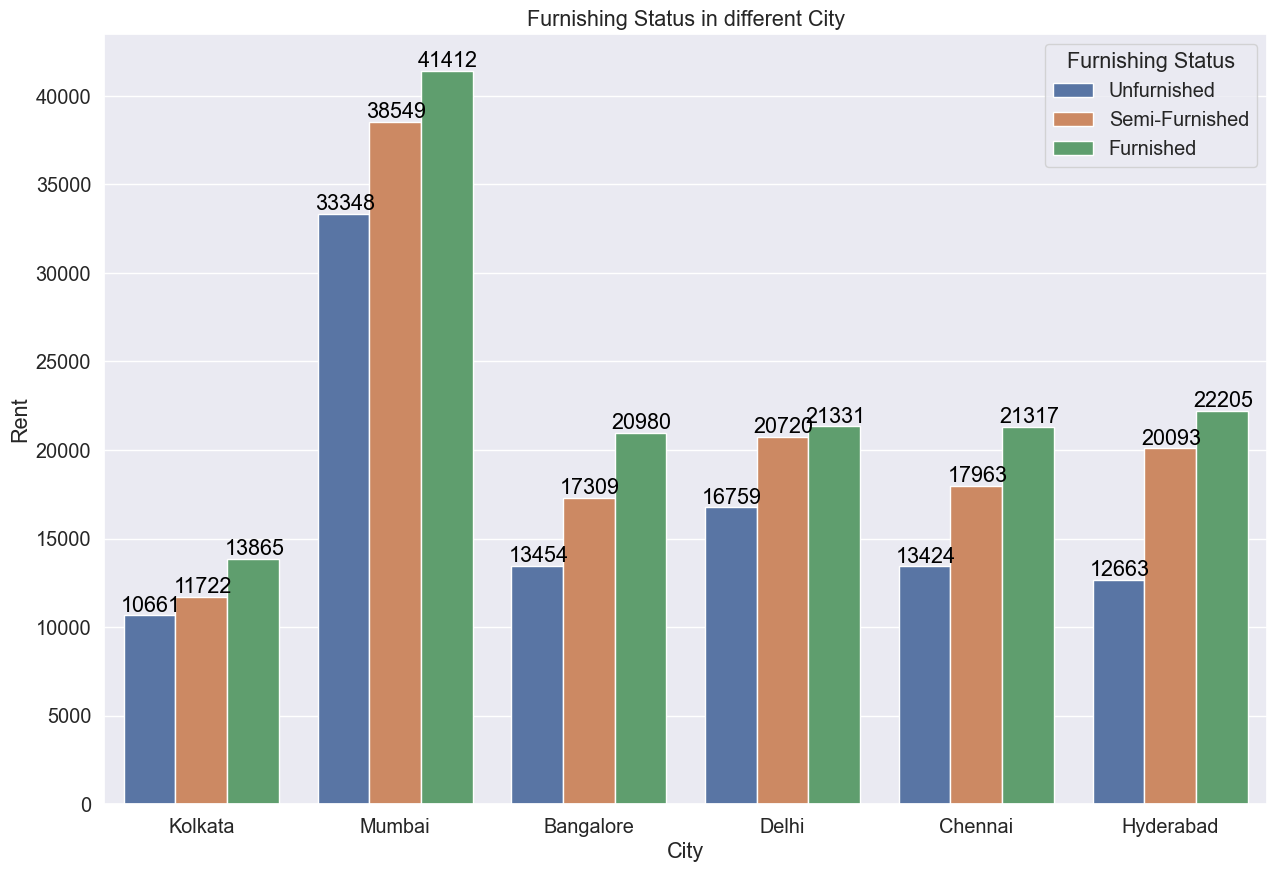

In [35]:
plt.subplots(figsize=(15,10))
ax= sns.barplot(x="City", y="Rent", hue='Furnishing Status', data=df, errorbar=None)

plt.ylabel("Rent");
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

plt.title("Furnishing Status in different City")
plt.show()

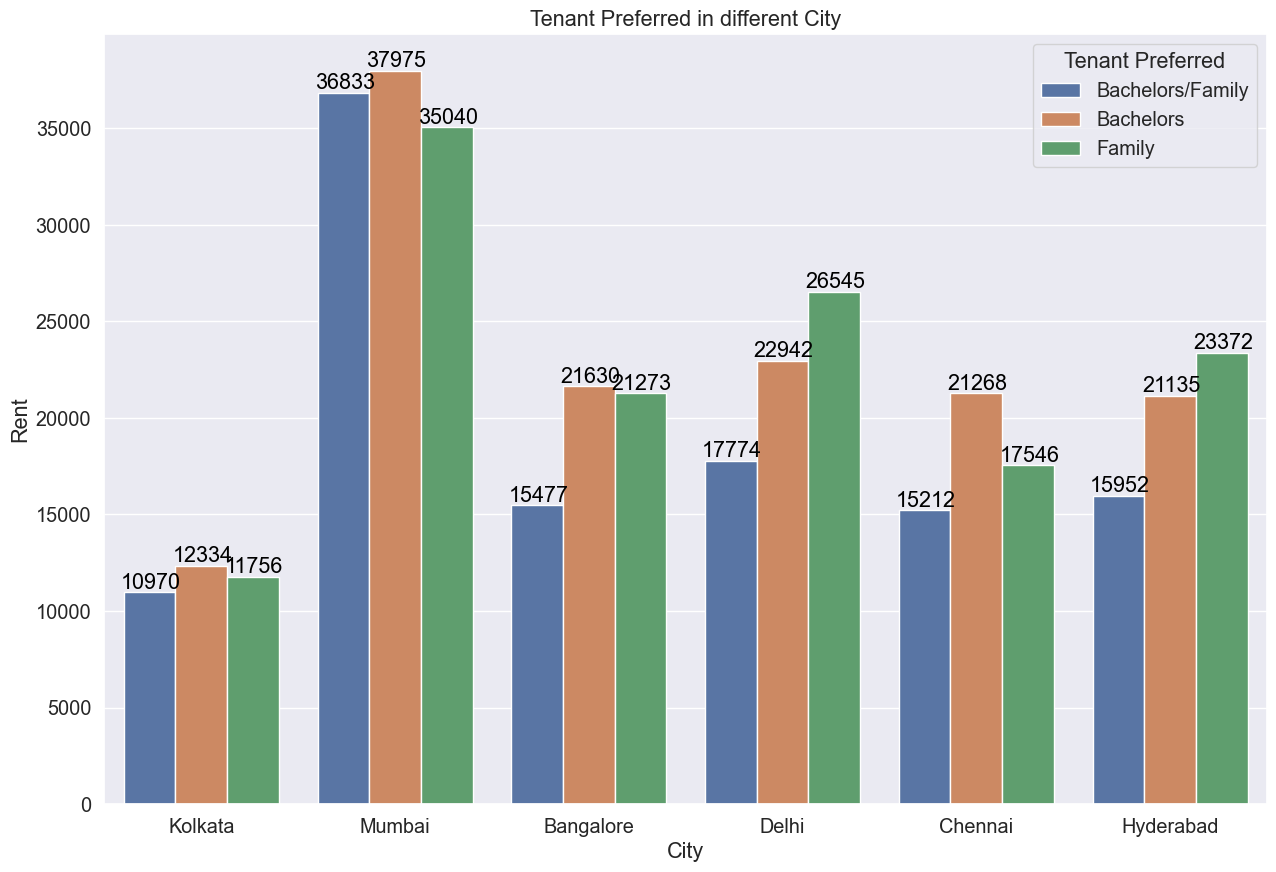

In [36]:
plt.subplots(figsize=(15,10))
ax= sns.barplot(x="City", y="Rent", hue='Tenant Preferred', data=df, errorbar=None)

plt.ylabel("Rent");
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

plt.title("Tenant Preferred in different City")
plt.show()

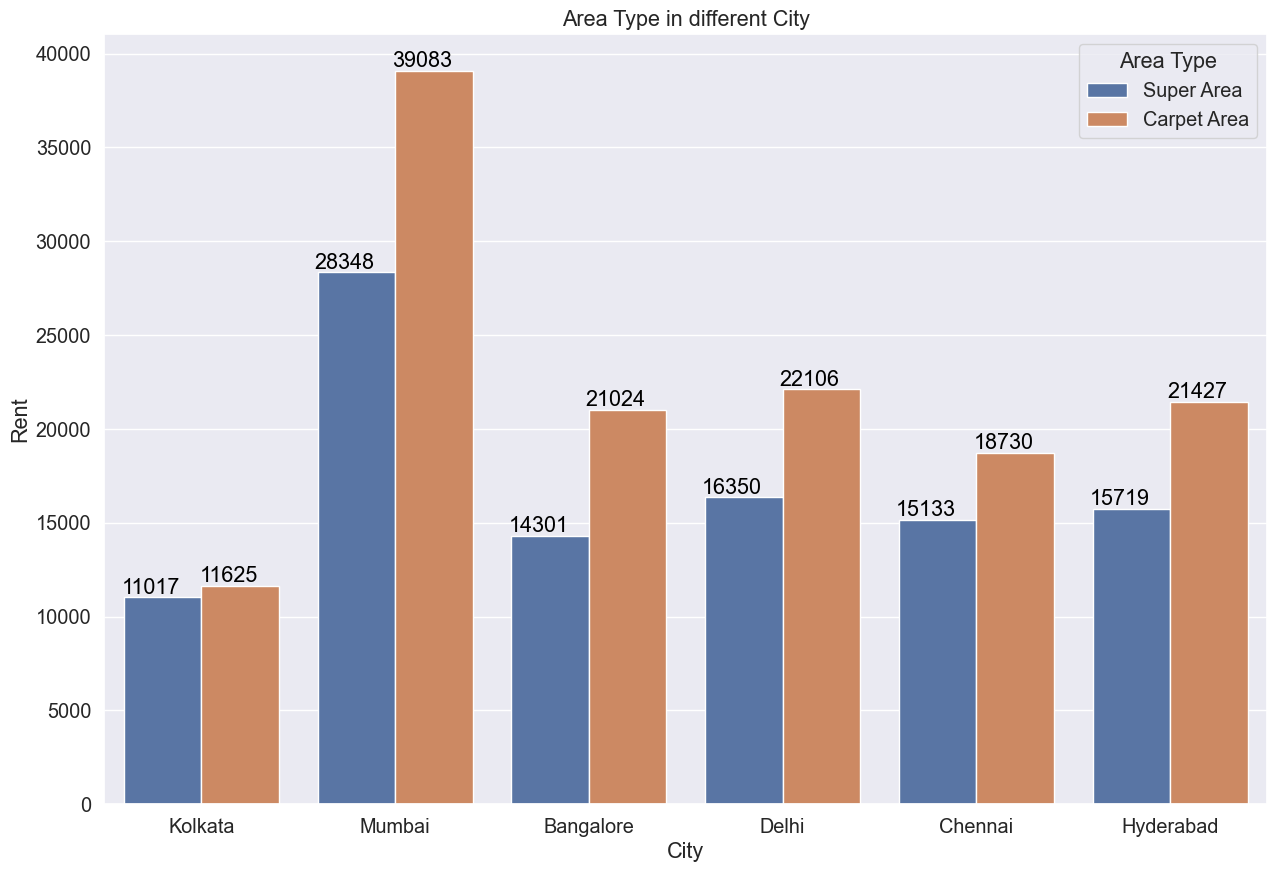

In [40]:
df =df[~df['Area Type'].str.contains("Built Area")]

plt.subplots(figsize=(15,10))
ax= sns.barplot(x="City", y="Rent", hue='Area Type', data=df, errorbar=None)

plt.ylabel("Rent");
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

plt.title("Area Type in different City")
plt.show()

In [41]:
fig = px.sunburst(
    df,
    path=['City', 'Area Type', 'Furnishing Status', 'Tenant Preferred'],
    width=900,
    height=900,
    title='Allotment of flats according to Bachelors/Family/(Bachelors/Family)',
    color_discrete_sequence=px.colors.cyclical.Phase

)
fig.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13496\2288703905.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



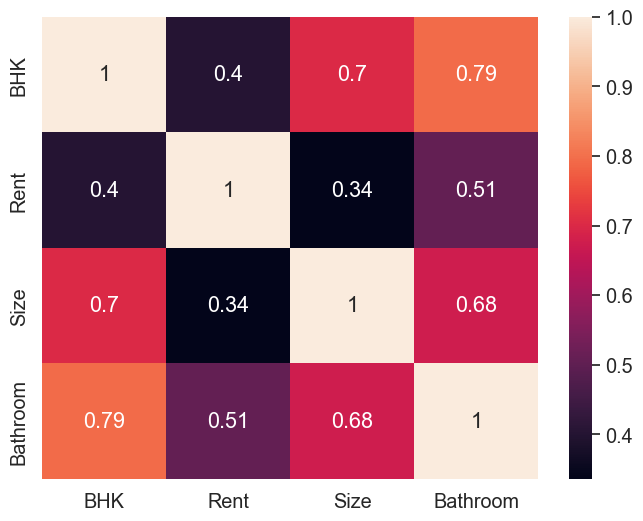

In [45]:
'''Correlation of Data'''

plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), vmax=1, annot=True)
plt.show()

### Trend and Correlation Analysis Insights

1. Trend Analysis: Rent Prices Over Time
Rent prices show fluctuations over time, with some noticeable peaks and troughs.
This indicates possible seasonal trends or market dynamics affecting rent prices.

2. BHK Analysis: Rent Prices Across Different BHK Categories
Higher BHK properties generally command higher rents.
There is significant variation within each BHK category, especially for higher BHKs.

3. Furnishing Status: Impact on Rent Prices
Fully furnished properties tend to have higher rents compared to semi-furnished and unfurnished properties.
The difference in rent prices highlights the value added by furnishing.

4. Tenant Preference: Influence on Rent Prices
Properties preferred by families tend to have higher rents.
Bachelors and mixed preferences show similar rent distributions, though slightly lower than family-preferred properties.

5. Correlation Matrix
Positive correlations exist between rent and other variables like size and BHK.
There is a moderate positive correlation between 'Size' and 'Rent' (0.63), and between 'BHK' and 'Rent' (0.45).
'Current Floor' and 'Total Floors' show weaker correlations with 'Rent'.

### Key Findings and Recommendations

1. Seasonal Trends: Regular fluctuations in rent prices suggest a potential for time-series forecasting models to predict future trends.

2. Property Features: Larger properties with more BHKs generally have higher rents, which can guide property investment and pricing strategies.

3. Furnishing Impact: Fully furnished properties command higher rents, indicating a potential for increased returns through furnishing investments.

4. Tenant Preferences: Properties preferred by families have higher rents, suggesting targeting family tenants could be more profitable.

5. City-Specific Strategies: Significant differences in rent prices across cities necessitate city-specific investment and pricing strategies.